In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_csv('modely_05_hospitalizovani_analyza_2020-11-25-00-13-25.csv', sep=';', header=0, comment='*')#,engine='python' )
df = pd.read_csv('modely_05_hospitalizovani_analyza_2021-02-20-02-20-47.csv', sep=';', header=0, comment='*')#,engine='python' )


<ipython-input-64-13390dc94cb6>:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist(df['deathi'],bins=40, range = (0,40), log=False, normed=True, rwidth=0.5, align = 'right')


mean 9.372319244553161
<8 8842
>=8 8737


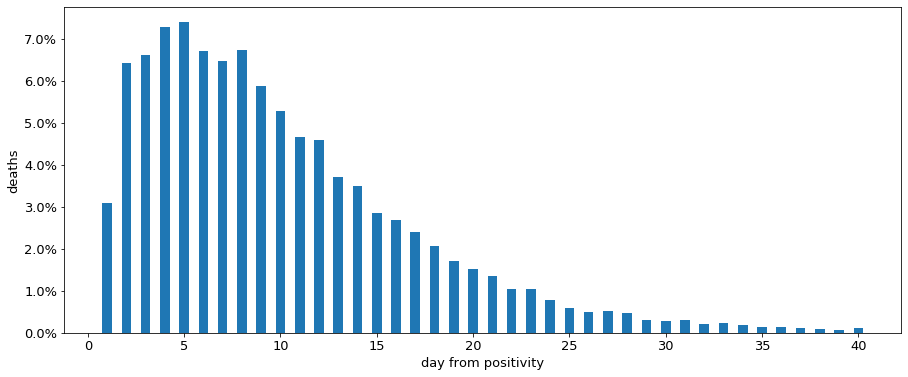

In [64]:
from matplotlib.ticker import PercentFormatter
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 13})


df['umrti'] = pd.to_datetime(df['datum_umrti'])

# selection of date
#df = df.loc[df['umrti']!=pd.NaT].loc[df['umrti']>pd.to_datetime('2021')]

procento = len(df.loc[df['umrti']>pd.to_datetime('2020')]['umrti'])/100


df['positivita'] = pd.to_datetime(df['datum_positivity'])
df['death'] = df['umrti'] - df['positivita']
df['deathi'] = df['death'].dt.days
plt.hist(df['deathi'],bins=40, range = (0,40), log=False, normed=True, rwidth=0.5, align = 'right')
print('mean', df['deathi'].mean())
print('<8', len(df.loc[df['deathi']<8]))
print('>=8', len(df.loc[df['deathi']>=8]))
#plt.xlim(0,30)
plt.ylabel('deaths')
plt.xlabel('day from positivity')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
None

mean 8.03617953239661
<7 9128
>=7 8451


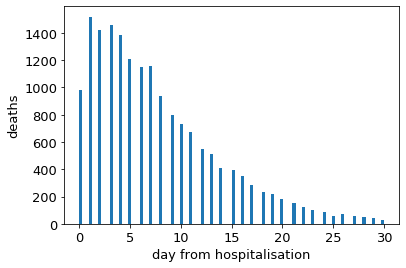

In [108]:
#df['umrti'] = pd.to_datetime(df['datum_umrti'])
df['hosp'] = pd.to_datetime(df['zahajeni_hosp'])
df['death2'] = df['umrti'] - df['hosp']
df['death2i'] = df['death2'].dt.days
plt.hist(df['death2i'],bins=100, range = (0,30), log=False)
print('mean', df['death2i'].mean())
print('<7', len(df.loc[df['death2i']<7]))
print('>=7', len(df.loc[df['death2i']>=7]))
plt.ylabel('deaths')
plt.xlabel('day from hospitalisation')
None

<ipython-input-31-0ad7b9b51810>:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist(df['priznaki'],bins=100, range = (0,30), log=False, normed=True)


mean 8.667904079725941
<12 71090
>=12 9185


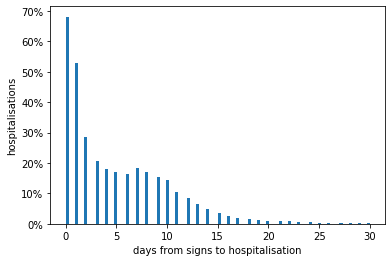

In [31]:
df['prizn'] = pd.to_datetime(df['datum_priznaku'])
df['hosp'] = pd.to_datetime(df['zahajeni_hosp'])
df['priznak'] = df['hosp'] - df['prizn']
df['priznaki'] = df['priznak'].dt.days
plt.hist(df['priznaki'],bins=100, range = (0,30), log=False, normed=True)
print('mean', df['priznaki'].mean())
print('<12', len(df.loc[df['priznaki']<12]))
print('>=12', len(df.loc[df['priznaki']>=12]))
plt.ylabel('hospitalisations')
plt.xlabel('days from signs to hospitalisation')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

None

In [14]:
#df.loc[df['priznaki']>12
#df.loc[df['umrti']!=pd.NaT].loc[df['umrti']>pd.to_datetime('2021')]
len(df.loc[df['umrti']>pd.to_datetime('2020')]['umrti'])
#df['umrti']



17579

# COVID hospitals capacity

/home/kacer/Downloads/modely_04_hospitalizovani_2021-02-02-01-01-18.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-01-26-01-01-37.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-01-30-01-01-37.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-01-25-01-01-26.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-02-08-01-01-22.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-01-21-01-01-15.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-02-07-01-01-27.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-02-17-02-00-42.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-02-16-02-00-14.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-02-13-02-00-35.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-01-17-01-01-54.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-02-06-01-01-38.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-01-19-01-01-30.csv
/home/kacer/Downloads/modely_04_hospitalizovani_2021-02-14-02-00

Text(0, 0.5, 'Počet hospitalizovaných nebo lůžek')

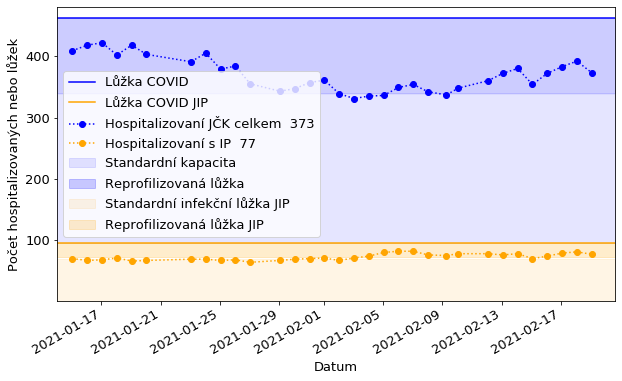

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 13})

hospitalizovani = pd.DataFrame()
for fn in glob.glob("/home/kacer/Downloads/modely_04_hospitalizovani_*.csv"):
    print(fn)
    df = pd.read_csv(fn, sep=';', header=0)
    df['date'] = fn[:-4].split('_')[3]
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d-%H-%M-%S') + pd.DateOffset(-1)
    hospitalizovani = hospitalizovani.append(df.loc[df['okres'].str[0:5] == 'CZ031'].loc[df['stav'] == 'Hospitalizován'])

FROM = pd.to_datetime('2021-01-14')
TO = pd.Timestamp.now()
    
REPROFIL_VOLNA = 71
REPROFIL_VOLNA_JIP = 18
REPROFIL_SKUTECNA = 122
REPROFIL_SKUTECNA_JIP = 23
REPROFIL_PLANOVANA = 371
REPROFIL_PLANOVANA_JIP = 84
VOLNA = REPROFIL_VOLNA + REPROFIL_VOLNA_JIP
VOLNA_JIP = REPROFIL_VOLNA_JIP
PLANOVANA = REPROFIL_PLANOVANA + REPROFIL_PLANOVANA_JIP - REPROFIL_SKUTECNA  - REPROFIL_SKUTECNA_JIP
hospitalizovani.set_index('date',inplace=True)
xx = hospitalizovani.groupby(['date']).sum()
#plt.plot([FROM,TO],[int(xx.iloc[-1]['pocet_pac']+VOLNA),int(xx.iloc[-1]['pocet_pac']+VOLNA)], label='Lůžka COVID  '+str(int(xx.iloc[-1]['pocet_pac']+VOLNA)), color='blue')
plt.plot([FROM,TO],[int(xx.iloc[-1]['pocet_pac']+VOLNA),int(xx.iloc[-1]['pocet_pac']+VOLNA)], label='Lůžka COVID', color='blue')
plt.fill_between([FROM,TO],[int(xx.iloc[-1]['pocet_pac']+VOLNA-REPROFIL_SKUTECNA-1),int(xx.iloc[-1]['pocet_pac']+VOLNA-REPROFIL_SKUTECNA-1)],[int(xx.iloc[-1]['jip']+VOLNA_JIP),int(xx.iloc[-1]['jip']+VOLNA_JIP)], label='Standardní kapacita', color='blue', alpha=0.1)
plt.fill_between([FROM,TO],[int(xx.iloc[-1]['pocet_pac']+VOLNA),int(xx.iloc[-1]['pocet_pac']+VOLNA)],[int(xx.iloc[-1]['pocet_pac']+VOLNA-REPROFIL_SKUTECNA),int(xx.iloc[-1]['pocet_pac']+VOLNA-REPROFIL_SKUTECNA)], label='Reprofilizovaná lůžka', color='blue', alpha=0.2)

#plt.plot([FROM,TO],[int(xx.iloc[-1]['jip']+VOLNA_JIP),int(xx.iloc[-1]['jip']+VOLNA_JIP)], label='Lůžka COVID JIP  '+str(int(xx.iloc[-1]['jip']+VOLNA_JIP)), color = 'orange')
plt.plot([FROM,TO],[int(xx.iloc[-1]['jip']+VOLNA_JIP),int(xx.iloc[-1]['jip']+VOLNA_JIP)], label='Lůžka COVID JIP', color = 'orange')
plt.fill_between([FROM,TO],[int(xx.iloc[-1]['jip']+VOLNA_JIP-REPROFIL_SKUTECNA_JIP-2),int(xx.iloc[-1]['jip']+VOLNA_JIP-REPROFIL_SKUTECNA_JIP)-2],[0,0], label='Standardní infekční lůžka JIP',color='orange', alpha=0.1)
plt.fill_between([FROM,TO],[int(xx.iloc[-1]['jip']+VOLNA_JIP),int(xx.iloc[-1]['jip']+VOLNA_JIP)],[int(xx.iloc[-1]['jip']+VOLNA_JIP-REPROFIL_SKUTECNA_JIP),int(xx.iloc[-1]['jip']+VOLNA_JIP-REPROFIL_SKUTECNA_JIP)], label='Reprofilizovaná lůžka JIP', color='orange', alpha=0.2)


#plt.plot([FROM,TO],[int(xx.iloc[-1]['pocet_pac']+VOLNA + PLANOVANA),int(xx.iloc[-1]['pocet_pac']+VOLNA + PLANOVANA)], label='Lůžka COVID plánovaná  '+str(int(xx.iloc[-1]['pocet_pac']+VOLNA + PLANOVANA)), color='green')
#plt.fill_between([FROM,TO],[int(xx.iloc[-1]['pocet_pac']+VOLNA),int(xx.iloc[-1]['pocet_pac']+VOLNA)],[int(xx.iloc[-1]['pocet_pac']+VOLNA + PLANOVANA),int(xx.iloc[-1]['pocet_pac']+VOLNA + PLANOVANA)] ,  color='green', alpha=0.05)

(xx['pocet_pac']).plot(marker='o', linestyle=':', label="Hospitalizovaní JČK celkem  " + str(int(xx.iloc[-1]['pocet_pac'])), color='blue')
(xx['jip']).plot(marker='o', linestyle=':', label="Hospitalizovaní s IP  " + str(int(xx.iloc[-1]['jip'])), color='orange')
#(xx['kyslik']).plot(marker='o', linestyle=':', label="Kyslík  " + str(int(xx.iloc[-1]['kyslik'])))
#(xx['upv']).plot(marker='o', linestyle=':', label="UPV  " + str(int(xx.iloc[-1]['upv'])))
#plt.annotate(str(xx['jip']),xx.index,xx['jip'], label="Hospitalizovaní JČK JIP")

#plt.legend(bbox_to_anchor=(1, 1.1))
plt.legend()
    
#from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
#ax.xaxis.set_major_locator(DayLocator())
#plt.major_locator(DayLocator())
plt.ylim(1,480)
plt.xlabel('Datum')
plt.ylabel('Počet hospitalizovaných nebo lůžek')
#plt.xlim('2021-01-14','2021-01-24')
#plt.yscale('log')

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 13})

xf = pd.DataFrame()
xxf = pd.DataFrame()

hospitalizovani = pd.DataFrame()
for fn in glob.glob("./*.xlsx"):
    print(fn)
    xls = pd.ExcelFile(fn)
    for sheet in xls.sheet_names:    
        try:
            df = pd.read_excel(fn, sheet_name=sheet)
            xf.loc[0,'date'] = sheet
            xf.loc[0,'hosp'] = df.iloc[14,12]
            xf.loc[0,'ip'] = df.iloc[14,7] + df.iloc[14,9]
            xxf = xxf.append(xf)
        except:
            pass


./Kapacity a hospitalizovaní 19_10_2020 až 17_2_2021 (2).xlsx


<Figure size 720x432 with 0 Axes>

Text(0, 0.5, 'Hospitalizovaní')

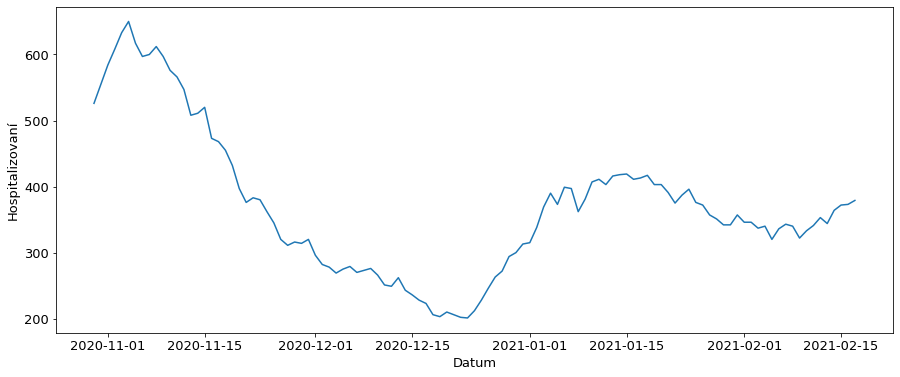

In [86]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 13})
xxf['time'] = pd.to_datetime(xxf['date'], format='%d.%m.%Y', errors='ignore')
plt.plot(xxf['time'], xxf['hosp'])
plt.xlabel('Datum')
plt.ylabel('Hospitalizovaní')

Text(0, 0.5, 'Hospitalizovaní IP')

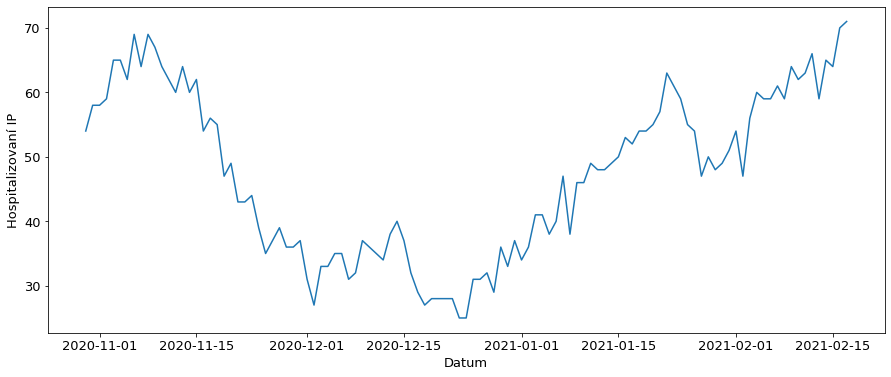

In [85]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 13})
xxf['time'] = pd.to_datetime(xxf['date'], format='%d.%m.%Y', errors='ignore')
plt.plot(xxf['time'], xxf['ip'])
plt.xlabel('Datum')
plt.ylabel('Hospitalizovaní IP')

In [49]:
#hospitalizovani
xx = hospitalizovani.groupby(['date']).sum()
xx.drop('orp', axis = 1, inplace = True)
xx

,komplikovany,jip,kyslik,upv,ecmo,pocet_pac
date,,,,,,
2021-01-15 01:01:35,80.0,70.0,170,27,0,409
2021-01-16 01:01:54,78.0,67.0,165,27,0,418
2021-01-17 01:02:02,80.0,68.0,164,26,0,422
2021-01-18 01:01:30,80.0,71.0,153,30,0,402


In [9]:
xx.iloc[-1]['pocet_pac']

402.0

In [40]:
df = pd.read_csv('/home/kacer/git/WPForce/CZ.txt', header=None, engine='python')

In [19]:
df.loc[df.iloc[:,0].str.isalpha()]
df.drop(df[df.1.str.contains(r'[^0-9a-zA-Z]')

ValueError: cannot index with vector containing NA / NaN values

In [59]:
xf = df.loc[df[0].str.contains(r'[a-z]')==True]

In [69]:
xf.to_csv(r'cz.txt', header=None, index=None, sep=' ')

In [67]:
xf = xf.loc[xf[0].str.len()<9]